# Plotting MODFLOW listing file budgets

This notebook shows how to 
* make stacked bar chart summaries of MODFLOW water budgets by stress period, including global budgets and budgets for advanced stress packages (SFR, Lake, etc).
* make stacked bar charts of net fluxes for each variable
* plot time series of individual terms (e.g. model packages, or advanced stress package variables)


In [1]:
from pathlib import Path
from mfexport.listfile import plot_list_budget, get_listfile_data, plot_budget_summary, plot_budget_term

#### Example MODFLOW-NWT model with monthly stress periods

In [2]:
listfile = Path('data/lpr/lpr_inset.list')
model_name = listfile.stem
model_start_date='2011-01-01'

output_path = 'output'

#### Example MODFLOW 6 model with biannual stress periods

In [3]:
mf6_listfile = Path('../mfexport/tests/data/shellmound/shellmound.list')
mf6_model_name = listfile.stem
mf6_model_start_date='1998-04-01'

output_path = 'output'

### Parse the listing file budget to a dataframe
* no ``budgetkey`` argument returns the global mass balance
* alternatively, use an identifying ``budgetkey`` (text string from the listing file) to get the terms for an advanced stress package

In [4]:
df = get_listfile_data(listfile=listfile, model_start_datetime=model_start_date)
df.head()

,STORAGE_IN,CONSTANT_HEAD_IN,WELLS_IN,RECHARGE_IN,STREAM_LEAKAGE_IN,TOTAL_IN,STORAGE_OUT,CONSTANT_HEAD_OUT,WELLS_OUT,RECHARGE_OUT,STREAM_LEAKAGE_OUT,TOTAL_OUT,IN-OUT,PERCENT_DISCREPANCY,kstp,kper
2011-02-01,426492.593750,6.469874e+05,0.0,4.471989e+02,555.530518,1074482.750,0.000000e+00,394497.15625,81550.476562,0.0,598601.3750,1074649.000,-166.250,-0.02,4,0
2011-03-01,483469.062500,6.166172e+05,0.0,4.410000e+02,1439.527466,1101966.750,0.000000e+00,502048.40625,71357.640625,0.0,528673.3125,1102079.375,-112.625,-0.01,4,1
2011-04-01,198845.421875,6.208312e+05,0.0,2.617255e+05,1598.823853,1083001.125,1.075373e+03,494819.87500,73988.679688,0.0,513919.3125,1083803.250,-802.125,-0.07,4,2
2011-05-01,13266.375977,6.350020e+05,0.0,7.910498e+05,669.892212,1439988.000,4.185641e+05,384565.34375,69679.789062,0.0,567054.6250,1439863.750,124.250,0.01,4,3
2011-06-01,0.000000,1.154976e+06,0.0,2.851267e+06,0.000000,4006243.000,2.526834e+06,307455.37500,303679.531250,0.0,868731.3750,4006700.500,-457.500,-0.01,4,4


In [5]:
mf6_df = get_listfile_data(listfile=mf6_listfile, model_start_datetime=mf6_model_start_date,
                           )
mf6_df.head()

,STO-SS_IN,STO-SY_IN,WEL_IN,RCH_IN,SFR_IN,TOTAL_IN,STO-SS_OUT,STO-SY_OUT,WEL_OUT,RCH_OUT,SFR_OUT,TOTAL_OUT,IN-OUT,PERCENT_DISCREPANCY,kstp,kper
1998-04-02,0.000000,0.000000,0.0,358429.78125,1.019368e+06,1377797.250,0.000000,0.000000,0.000000,0.0,1.378546e+06,1378546.000,-748.76062,-0.05,0,0
2007-04-02,6.829200,2415.879150,0.0,358429.78125,1.288051e+06,1648903.875,0.000000,0.000000,500968.875000,0.0,1.147937e+06,1648906.125,-2.27980,-0.00,9,1
2007-10-02,1141.329956,381346.062500,0.0,253336.90625,7.053851e+05,1341209.375,27.621799,10508.920898,527275.625000,0.0,8.033984e+05,1341210.625,-1.22870,-0.00,4,2
2008-04-02,0.000000,0.000000,0.0,456429.18750,1.081024e+06,1537452.750,1518.002197,350718.281250,17584.275391,0.0,1.167628e+06,1537448.625,4.16440,0.00,4,3
2008-10-02,401.908112,112861.390625,0.0,320935.68750,1.216493e+06,1650692.375,44.325199,15359.580078,652556.437500,0.0,9.827312e+05,1650691.500,0.80590,0.00,4,4


#### Get an advanced stress package budget
* in this case, for the SFR package
* this requires a package budget to be written to the listing file (MODFLOW 6)

In [6]:
sfr_df = get_listfile_data(listfile=mf6_listfile, model_start_datetime=mf6_model_start_date,
                       budgetkey='SFR BUDGET')
sfr_df.head()

,GWF_IN,RAINFALL_IN,EVAPORATION_IN,RUNOFF_IN,EXT-INFLOW_IN,EXT-OUTFLOW_IN,STORAGE_IN,AUXILIARY_IN,TOTAL_IN,GWF_OUT,...,RUNOFF_OUT,EXT-INFLOW_OUT,EXT-OUTFLOW_OUT,STORAGE_OUT,AUXILIARY_OUT,TOTAL_OUT,IN-OUT,PERCENT_DISCREPANCY,kstp,kper
1998-04-02,1.378638e+06,0.0,0.0,390723.562500,52337480.0,0.0,0.0,0.0,54106840.0,1.019311e+06,...,0.0,0.0,53087528.0,0.0,0.0,54106840.0,-1.490100e-08,-0.0,0,0
2007-04-02,1.147938e+06,0.0,0.0,213503.109375,56911972.0,0.0,0.0,0.0,58273412.0,1.288051e+06,...,0.0,0.0,56985364.0,0.0,0.0,58273412.0,1.490100e-08,0.0,9,1
2007-10-02,8.033963e+05,0.0,0.0,238699.078125,19438356.0,0.0,0.0,0.0,20480450.0,7.053850e+05,...,0.0,0.0,19775066.0,0.0,0.0,20480450.0,0.000000e+00,0.0,4,2
2008-04-02,1.167627e+06,0.0,0.0,227403.312500,52732372.0,0.0,0.0,0.0,54127404.0,1.081026e+06,...,0.0,0.0,53046380.0,0.0,0.0,54127404.0,2.235200e-08,0.0,4,3
2008-10-02,9.827311e+05,0.0,0.0,386176.125000,51699144.0,0.0,0.0,0.0,53068052.0,1.216493e+06,...,0.0,0.0,51851560.0,0.0,0.0,53068052.0,-7.450600e-09,-0.0,4,4


### Basic summary of MODFLOW water balance

<AxesSubplot:title={'center':'Little Plover example budget summary'}, ylabel='Flow rate, in model units of $L^3/T$'>

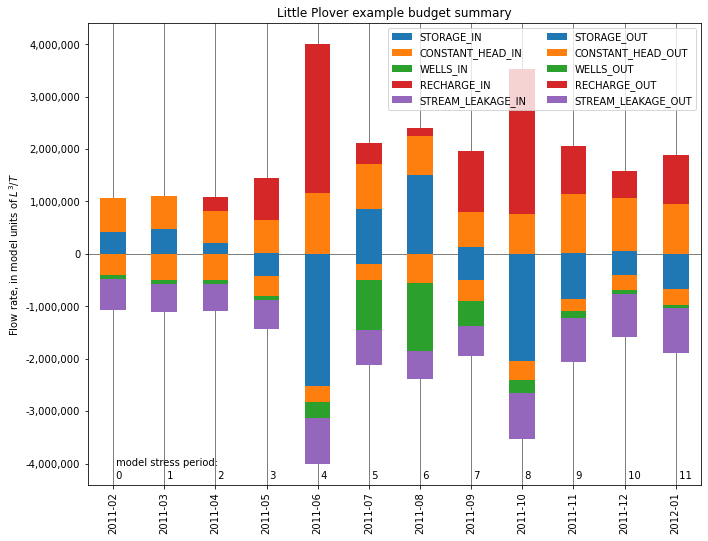

In [7]:
plot_budget_summary(df, title_prefix='Little Plover example',
                    xtick_stride=1)

### Plot just the net fluxes for each component
* add a secondary axis with other units

Note: `model_length_units` and `model_time_units` are needed to convert units to the secondary axis units.

<AxesSubplot:title={'center':'Little Plover example budget summary (net fluxes)'}, ylabel='Flow rate, in model units of $ft^3/T$'>

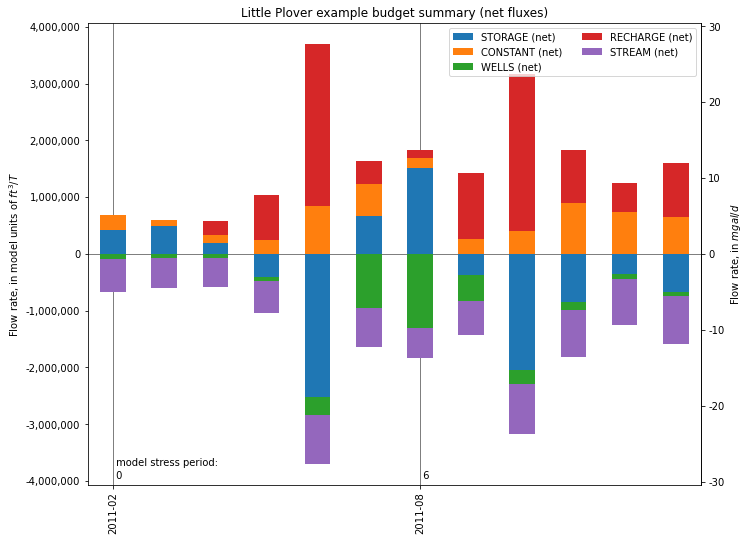

In [8]:
plot_budget_summary(df, title_prefix='Little Plover example', term_nets=True,
                    model_length_units='feet', model_time_units='time',
                    secondary_axis_units='mgal/day')

### Plot a subset of results

This can be useful for models with many stress periods

<AxesSubplot:title={'center':'Little Plover example budget summary'}, ylabel='Flow rate, in model units of $L^3/T$'>

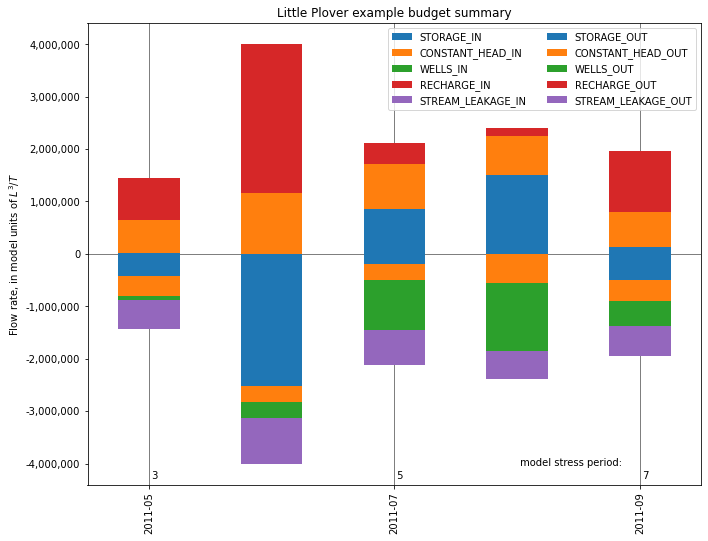

In [9]:
plot_budget_summary(df, title_prefix='Little Plover example',
                    xtick_stride=2,
                        plot_start_date='2011-05', plot_end_date='2011-09')

### Plot a budget term
Two plots are produced
* absolute values, optionally with secondary axis as above
* as a fraction of model or advanced stress package (e.g. SFR) budget

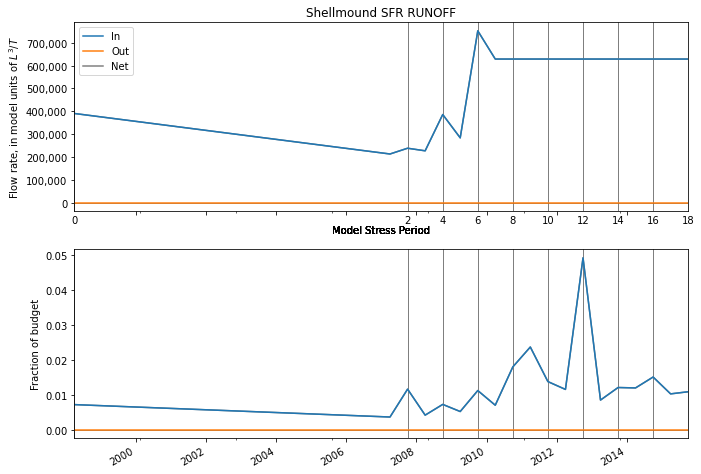

In [10]:
plot_budget_term(sfr_df, 'RUNOFF_IN', title_prefix='Shellmound SFR')

### Plot term by stress period instead of time

Can be useful for models with long spin-up periods that obscure shorter periods of interest when whole simulation time is plotted.

/Users/aleaf/Documents/GitHub/modflow-export/mfexport/listfile.py:558: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(datetime_labels, rotation=90)


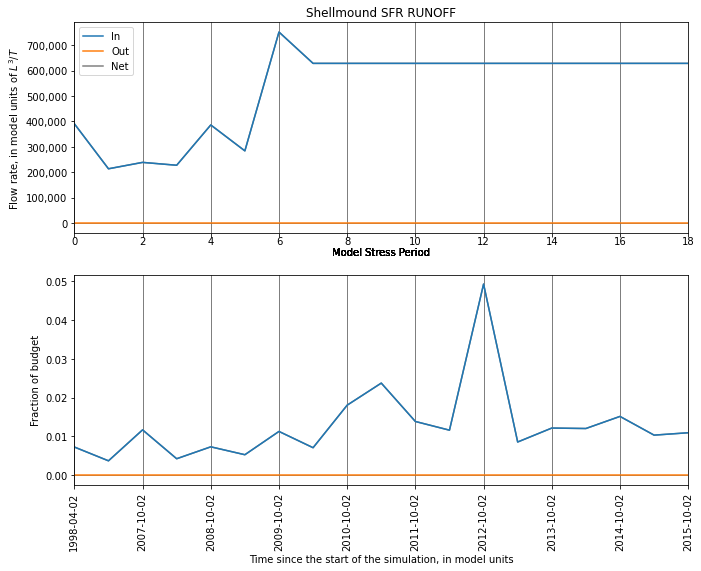

In [11]:
plot_budget_term(sfr_df, 'RUNOFF_IN', title_prefix='Shellmound SFR',
                 plot_start_date=None, plot_end_date=None,
                 datetime_xaxis=False)

### Plot mass balance error

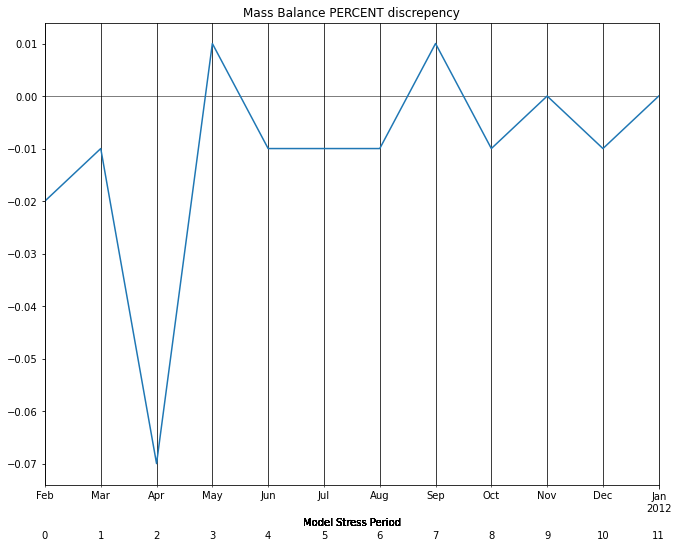

In [13]:
plot_budget_term(df, 'PERCENT_DISCREPANCY', title_prefix='Mass Balance', 
                 title_suffix='discrepency')

### Macro to plot everything to PDFs
* budget summary (in/out and net)
* timeseries of budget terms for each package, and within each advanced stress package

In [14]:
plot_list_budget(listfile=mf6_listfile, output_path=output_path,
                 model_start_datetime='1998-04-01')

wrote output/pdfs/listfile_budget_summary.pdf
wrote output/pdfs/listfile_budget_by_term.pdf
